# Titanic

This is the beginning of my first notebook. I'm going to blaze through the code without much explanation.. because explanation should be fairly obvious based on the function names. Also, this project is just to get my feet wet, not necessarily teach anyone anything.

## TOC

- References
- Helper Functions
- Exploration
  - Survived
  - Survival by Pclass
  - Survival by ...

## References

- [Kaggle: Titanic Random Forest](https://www.kaggle.com/zlatankr/titanic/titanic-random-forest-82-78)
- [Kaggle: Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)
- [Kaggle: Intro Ensemble Stacking](https://www.kaggle.com/arthurtok/titanic/introduction-to-ensembling-stacking-in-python)

## Helper Functions

In [1]:
def countsSummary(pdSeries, columns=['Total Cnt', '% of Total']):
    df = pd.concat([pdSeries.value_counts(), pdSeries.value_counts(normalize=True)], axis=1)
    df.columns = columns
    print df

def groupbySummary(pdSeries1, pdSeries2, ignore=None, columns=['Total', '% of Total']):
    s = pdSeries1.groupby(pdSeries2)
    if ignore != None:
        inds = [i for i,val in enumerate(pdSeries1) if val != ignore]
        t = pdSeries1[inds].groupby(pdSeries2)
        df = pd.concat([s.count(), s.mean(), t.count()], axis=1)
        if len(columns) == 2:
            columns.append('Cnt of Total')
    else:
        df = pd.concat([s.count(), s.mean()], axis=1)
    df.columns = columns
    print df
    return sns.countplot(pdSeries2, hue=pdSeries1)

def groupbyCutSummary(pdSeries1, pdSeries2, cutLen):
    s = pd.qcut(pdSeries2,cutLen)
    t = pdSeries1.groupby(s)
    print t.value_counts()
    print t.mean()
    return sns.countplot(s, hue=pdSeries1)

## Exploration

- Import libraries
- Load data
- Move from Left to Right exploring each column and generate extra columns as necessary

In [2]:
import os
import ryan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### `Survived`

In [5]:
countsSummary(train['Survived'])

   Total Cnt  % of Total
0        549    0.616162
1        342    0.383838


### Survival by `Pclass`

        Total  % of Total  Cnt of Total
Pclass                                 
1         216    0.629630           136
2         184    0.472826            87
3         491    0.242363           119


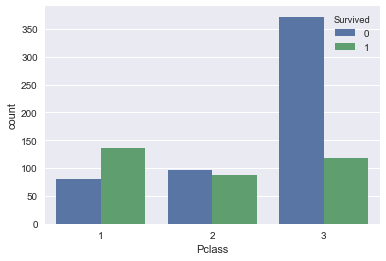

In [6]:
groupbySummary(train['Survived'], train['Pclass'], 0)

### Survival by `Name_Title`

In [7]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

           Total  % of Total  Cnt of Total
Capt.          1    0.000000           NaN
Col.           2    0.500000           1.0
Don.           1    0.000000           NaN
Dr.            7    0.428571           3.0
Jonkheer.      1    0.000000           NaN
Lady.          1    1.000000           1.0
Major.         2    0.500000           1.0
Master.       40    0.575000          23.0
Miss.        182    0.697802         127.0
Mlle.          2    1.000000           2.0
Mme.           1    1.000000           1.0
Mr.          517    0.156673          81.0
Mrs.         125    0.792000          99.0
Ms.            1    1.000000           1.0
Rev.           6    0.000000           NaN
Sir.           1    1.000000           1.0
the            1    1.000000           1.0


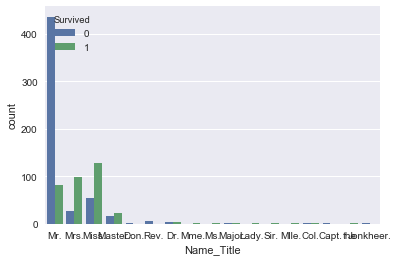

In [8]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
groupbySummary(train['Survived'], train['Name_Title'], 0)

### Survival by `Name_Length`

Name_Length  Survived
[12, 19]     0           159
             1            45
(19, 23]     0           109
             1            47
(23, 27]     0           134
             1            63
(27, 32]     0            92
             1            73
(32, 82]     1           114
             0            55
Name: Survived, dtype: int64
Name_Length
[12, 19]    0.220588
(19, 23]    0.301282
(23, 27]    0.319797
(27, 32]    0.442424
(32, 82]    0.674556
Name: Survived, dtype: float64


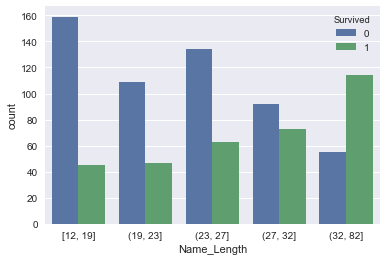

In [9]:
train['Name_Length'] = train['Name'].apply(lambda x: len(x))
groupbyCutSummary(train['Survived'], train['Name_Length'], 5)

### Survival by `Sex`

        Total  % of Total  Cnt of Total
Sex                                    
female    314    0.742038           233
male      577    0.188908           109


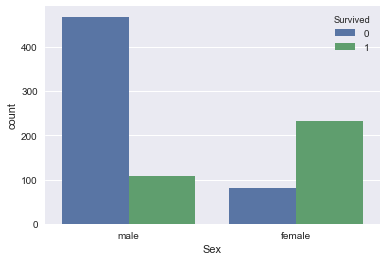

In [16]:
groupbySummary(train['Survived'], train['Sex'], 0)

### Survival by `Age`

Age         Survived
[0.42, 19]  0           85
            1           79
(19, 25]    0           92
            1           45
(25, 31.8]  0           77
            1           50
(31.8, 41]  0           81
            1           63
(41, 80]    0           89
            1           53
Name: Survived, dtype: int64
Age
[0.42, 19]    0.481707
(19, 25]      0.328467
(25, 31.8]    0.393701
(31.8, 41]    0.437500
(41, 80]      0.373239
Name: Survived, dtype: float64


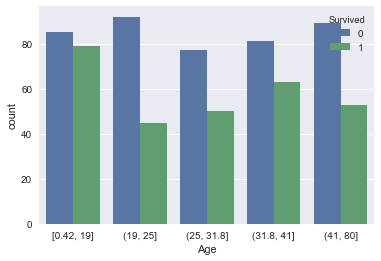

In [10]:
groupbyCutSummary(train['Survived'], train['Age'], 5)

### Survival by `SibSp`

       Total  % of Total  Cnt of Total
SibSp                                 
0        608    0.345395         210.0
1        209    0.535885         112.0
2         28    0.464286          13.0
3         16    0.250000           4.0
4         18    0.166667           3.0
5          5    0.000000           NaN
8          7    0.000000           NaN


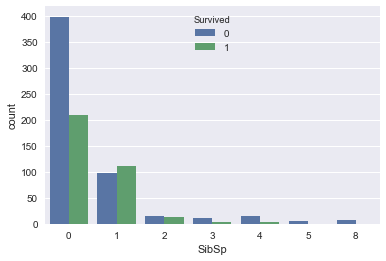

In [13]:
groupbySummary(train['Survived'], train['SibSp'], 0)

### Survival by `Parch`

       Total  % of Total  Cnt of Total
Parch                                 
0        678    0.343658         233.0
1        118    0.550847          65.0
2         80    0.500000          40.0
3          5    0.600000           3.0
4          4    0.000000           NaN
5          5    0.200000           1.0
6          1    0.000000           NaN


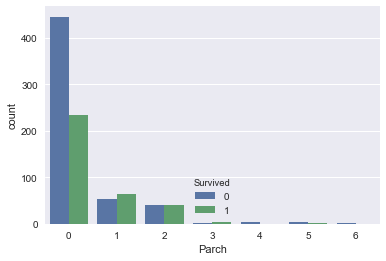

In [14]:
groupbySummary(train['Survived'],train['Parch'], 0)

### Survival by `Ticket_First`

In [11]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

   Total  % of Total  Cnt of Total
1    146    0.630137          92.0
2    183    0.464481          85.0
3    301    0.239203          72.0
4     10    0.200000           2.0
5      3    0.000000           NaN
6      6    0.166667           1.0
7      9    0.111111           1.0
8      2    0.000000           NaN
9      1    1.000000           1.0
A     29    0.068966           2.0
C     47    0.340426          16.0
F      7    0.571429           4.0
L      4    0.250000           1.0
P     65    0.646154          42.0
S     65    0.323077          21.0
W     13    0.153846           2.0


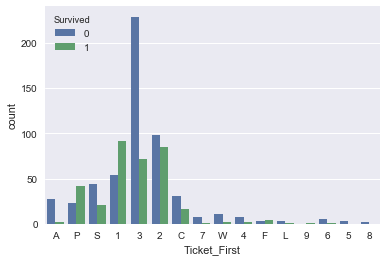

In [12]:
train['Ticket_First'] = train['Ticket'].apply(lambda x: x[0])
groupbySummary(train['Survived'], train['Ticket_First'], 0)

### Survival by `Fare`

Fare               Survived
[0, 7.55]          0           79
                   1           13
(7.55, 7.854]      0           61
                   1           26
(7.854, 8.05]      0           87
                   1           19
(8.05, 10.5]       0           60
                   1           18
(10.5, 14.454]     0           48
                   1           36
(14.454, 21.679]   0           51
                   1           37
(21.679, 27]       1           46
                   0           43
(27, 39.688]       0           57
                   1           34
(39.688, 77.958]   1           47
                   0           42
(77.958, 512.329]  1           66
                   0           21
Name: Survived, dtype: int64
Fare
[0, 7.55]            0.141304
(7.55, 7.854]        0.298851
(7.854, 8.05]        0.179245
(8.05, 10.5]         0.230769
(10.5, 14.454]       0.428571
(14.454, 21.679]     0.420455
(21.679, 27]         0.516854
(27, 39.688]         0.373626
(39.688, 77.958]  

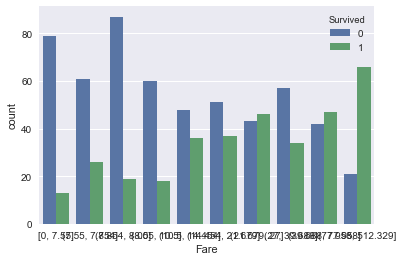

In [18]:
groupbyCutSummary(train['Survived'], train['Fare'], 10)

You'd think `Ticket_First` and `Fare` would have a strong relation. This calc is just for the sake of curiosity. (`P` and `1` have high survival rates and counts.)

Fare               Ticket_First
[0, 7.854]         False           179
(7.854, 10.5]      False           183
                   True              1
(10.5, 21.679]     False           170
                   True              2
(21.679, 39.688]   False           164
                   True             16
(39.688, 512.329]  False           130
                   True             46
Name: Ticket_First, dtype: int64
Fare
[0, 7.854]           0.000000
(7.854, 10.5]        0.005435
(10.5, 21.679]       0.011628
(21.679, 39.688]     0.088889
(39.688, 512.329]    0.261364
Name: Ticket_First, dtype: float64


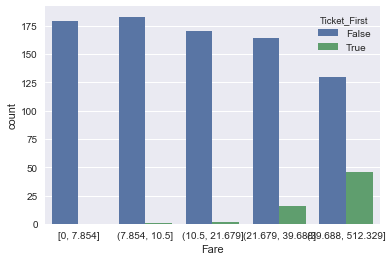

In [21]:
groupbyCutSummary(train['Ticket_First'].apply(lambda x: x == 'P'), train['Fare'], 5)

### Surivival by `Cabin`

    Total  % of Total  Cnt of Total
A      15    0.466667           7.0
B      47    0.744681          35.0
C      59    0.593220          35.0
D      33    0.757576          25.0
E      32    0.750000          24.0
F      13    0.615385           8.0
G       4    0.500000           2.0
NA    687    0.299854         206.0
T       1    0.000000           NaN


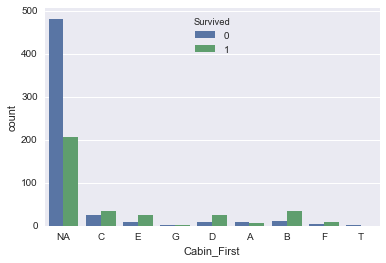

In [28]:
train['Cabin_First'] = train['Cabin'].apply(lambda x: x[0] if type(x) == type("") else "NA")
groupbySummary(train['Survived'], train['Cabin_First'], 0)

### Survival by `Embarked`

          Total  % of Total  Cnt of Total
Embarked                                 
C           168    0.553571            93
Q            77    0.389610            30
S           644    0.336957           217


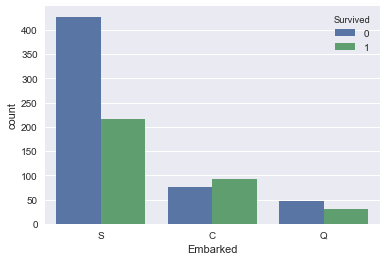

In [29]:
groupbySummary(train['Survived'], train['Embarked'], 0)